Codes from : https://github.com/lmoroney/dlaicourse/blob/master/Course%202%20-%20Part%208%20-%20Lesson%202%20-%20Notebook%20(RockPaperScissors).ipynb

In [4]:
!wget --no-check-certificate \
     https://storage.googleapis.com/download.tensorflow.org/data/rps.zip

!wget --no-check-certificate \
    https://storage.googleapis.com/download.tensorflow.org/data/rps-test-set.zip

--2022-12-10 16:24:53--  https://storage.googleapis.com/download.tensorflow.org/data/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.68.128, 142.250.4.128, 74.125.24.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.68.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘rps-test-set.zip’

rps-test-set.zip    100%[===================>]  28.15M  14.2MB/s    in 2.0s    

2022-12-10 16:24:55 (14.2 MB/s) - ‘rps-test-set.zip’ saved [29516758/29516758]



In [6]:
import os
import zipfile

local_zip = '/content/rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()
zip_ref.close()

local_zip = '/content/rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()
zip_ref.close()


# Look 
# https://stackoverflow.com/questions/3083235/unzipping-file-results-in-badzipfile-file-is-not-a-zip-file

In [10]:
rock_dir=os.path.join("/content/rps/rock")
paper_dir=os.path.join("/content/rps/paper")
scissors_dir=os.path.join("/content/rps/scissors")

print("total training rock images:", len(os.listdir(rock_dir)))
print("total training paper images :", len(os.listdir(paper_dir)))
print("Total training scissors images", len(os.listdir(scissors_dir)))

rock_files=os.listdir(rock_dir)
print(rock_files [:10])

paper_files=os.listdir(paper_dir)
print(paper_files[:10])

scissors_files=os.listdir(scissors_dir)
print(scissors_files[:10])

total training rock images: 840
total training paper images : 840
Total training scissors images 840
['rock03-096.png', 'rock04-094.png', 'rock05ck01-012.png', 'rock03-063.png', 'rock01-063.png', 'rock02-110.png', 'rock04-033.png', 'rock06ck02-115.png', 'rock03-002.png', 'rock07-k03-102.png']
['paper03-091.png', 'paper07-104.png', 'paper02-026.png', 'paper01-078.png', 'paper01-052.png', 'paper06-114.png', 'paper03-077.png', 'paper06-009.png', 'paper07-081.png', 'paper05-005.png']
['testscissors03-054.png', 'testscissors03-073.png', 'scissors03-061.png', 'scissors03-039.png', 'testscissors02-014.png', 'scissors02-077.png', 'scissors01-014.png', 'scissors01-102.png', 'scissors02-065.png', 'testscissors01-018.png']


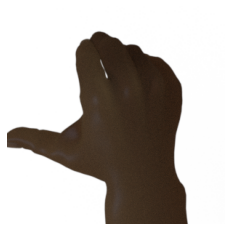

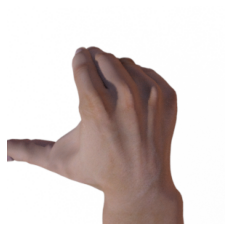

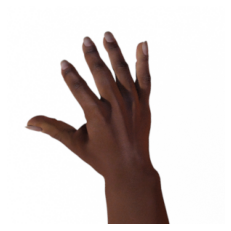

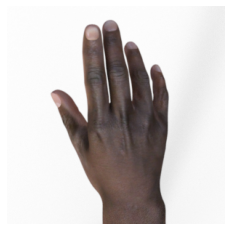

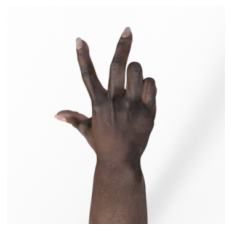

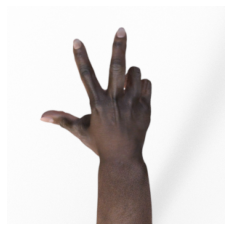

In [13]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index=2

next_rock=[os.path.join(rock_dir, fname)
            for fname in rock_files[pic_index-2:pic_index]]
next_paper = [os.path.join(paper_dir, fname) 
                for fname in paper_files[pic_index-2:pic_index]]
next_scissors = [os.path.join(scissors_dir, fname) 
                for fname in scissors_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_rock+next_paper+next_scissors):
  img=mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis("Off")
  plt.show()

In [26]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = "/content/rps"
training_datagen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    shear_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest")

VALIDATION_DIR = "/content/rps-test-set"
validation_datagen= ImageDataGenerator(rescale = 1./255)

train_generator =training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(150,150),
    class_mode="categorical",
    batch_size=126)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126)


model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,(3,3), activation="relu", input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    #third
    tf.keras.layers.Conv2D(128, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    #Fourth
    tf.keras.layers.Conv2D(128,(3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    #Flatten
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    #512 neurons
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dense(3, activation="softmax") #for 3 
])

model.summary()

model.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics=['accuracy'])

history = model.fit(train_generator, epochs=25, steps_per_epoch=20, validation_data = validation_generator, verbose = 1, validation_steps=3)

model.save("rps.h5")

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 74, 74, 64)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 34, 34, 128)       73856     
                                       

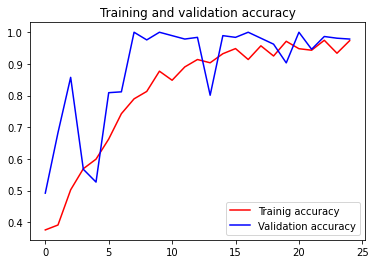

<Figure size 432x288 with 0 Axes>

In [29]:
import matplotlib.pyplot as plt
acc= history.history["accuracy"]
val_acc=history.history["val_accuracy"]
loss=history.history["loss"]
val_loss=history.history["val_loss"]

epochs=range(len(acc))

plt.plot(epochs, acc, "r", label="Trainig accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend(loc=0)
plt.figure()

plt.show()

In [42]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
  path =fn
  img=tf.keras.utils.load_img(path, target_size=(150,150))
  x=tf.keras.utils.img_to_array(img)
  x=np.expand_dims(x, axis=0)

  images=np.vstack([x])
  print(model.predict(images, batch_size=10))
  print(fn)
  #print(classes)

Saving rock01-008.png to rock01-008 (2).png
1/1 [==============================] - 0s 17ms/step
[[0. 1. 0.]]
rock01-008.png
